In [1]:
import glob
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


In [2]:
real = 'real'


In [3]:
model = "manopt"
path_manopt = f"/glade/scratch/ggantos/holodec/models/manopt/"
model_loc_manopt = f"/glade/work/schreck/repos/HOLO/dev/holodec-ml/results/manopt/"
with open(f"{path_manopt}inference/{real}/{model}_particles.pkl", "rb") as input_file:
    particles_manopt = pickle.load(input_file)

try:
    h_idx_indices_manopt = list(set(sorted([int(x.split("_")[1]) for x in glob.glob(f"{model_loc_manopt}/{real}/propagated/true*")])))
except:
    h_idx_indices_manopt = list(set(sorted([int(x.split("_")[2]) for x in glob.glob(f"{model_loc_manopt}/{real}/propagated/true*")])))
print(f"h_idx_indices_manopt: {h_idx_indices_manopt}")


h_idx_indices_manopt: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [4]:
model = "holosuite"
path_holosuite = f"/glade/scratch/ggantos/holodec/models/manopt/"
model_loc_holosuite = f"/glade/work/schreck/repos/HOLO/dev/holodec-ml/results/manopt/"
with open(f"{path_holosuite}inference/{real}/{model}_particles.pkl", "rb") as input_file:
    particles_holosuite = pickle.load(input_file)

try:
    h_idx_indices_holosuite = list(set(sorted([int(x.split("_")[1]) for x in glob.glob(f"{model_loc_holosuite}/{real}/propagated/true*")])))
except:
    h_idx_indices_holosuite = list(set(sorted([int(x.split("_")[2]) for x in glob.glob(f"{model_loc_holosuite}/{real}/propagated/true*")])))
print(f"h_idx_indices_holosuite: {h_idx_indices_holosuite}")



h_idx_indices_holosuite: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [5]:
bins = {'x': np.arange(-7300,7300,(7300--7300)//19),
        'y': np.arange(-4800,4800,(4800--4800)//19),
        'z': np.arange(14000,158000,(158000-14000)//20),
        'd': np.arange(0,100,(100-0)//18)}

widths = {'x': (7300--7300)//19,
          'y': (4800--4800)//19,
          'z': (158000-14000)//20,
          'd': (100-0)//18}

if 'real' in real:
    true_label = "Holosuite"
else:
    true_label = "True"
    

In [6]:
hist_avg_manopt = {}

for true in ('pred_2d', 'true_2d', 'pred_2d_unmatched', 'true_2d_unmatched', 'pred_2d_matched', 'true_2d_matched'):
    hist_avg_manopt[true] = {}
    for coord in ['x', 'y', 'z', 'd']:
        hist = []
        for h_idx in particles_manopt.keys():
            h, binEdges = np.histogram(particles_manopt[h_idx][true][coord], bins=bins[coord])
            hist.append(h)
        hist_avg_manopt[true][coord] = np.stack(hist)
        hist_avg_manopt[true][coord+'_mean'] = np.stack(hist).mean(axis=0)
        hist_avg_manopt[true][coord+'_std'] = np.stack(hist).std(axis=0) / ((len(h_idx_indices_manopt) - 1) ** 0.5)


In [7]:
hist_avg_holosuite = {}

for true in ('pred_2d', 'true_2d', 'pred_2d_unmatched', 'true_2d_unmatched', 'pred_2d_matched', 'true_2d_matched'):
    hist_avg_holosuite[true] = {}
    for coord in ['x', 'y', 'z', 'd']:
        hist = []
        for h_idx in particles_holosuite.keys():
            h, binEdges = np.histogram(particles_holosuite[h_idx][true][coord], bins=bins[coord])
            hist.append(h)
        hist_avg_holosuite[true][coord] = np.stack(hist)
        hist_avg_holosuite[true][coord+'_mean'] = np.stack(hist).mean(axis=0)
        hist_avg_holosuite[true][coord+'_std'] = np.stack(hist).std(axis=0) / ((len(h_idx_indices_holosuite) - 1) ** 0.5)


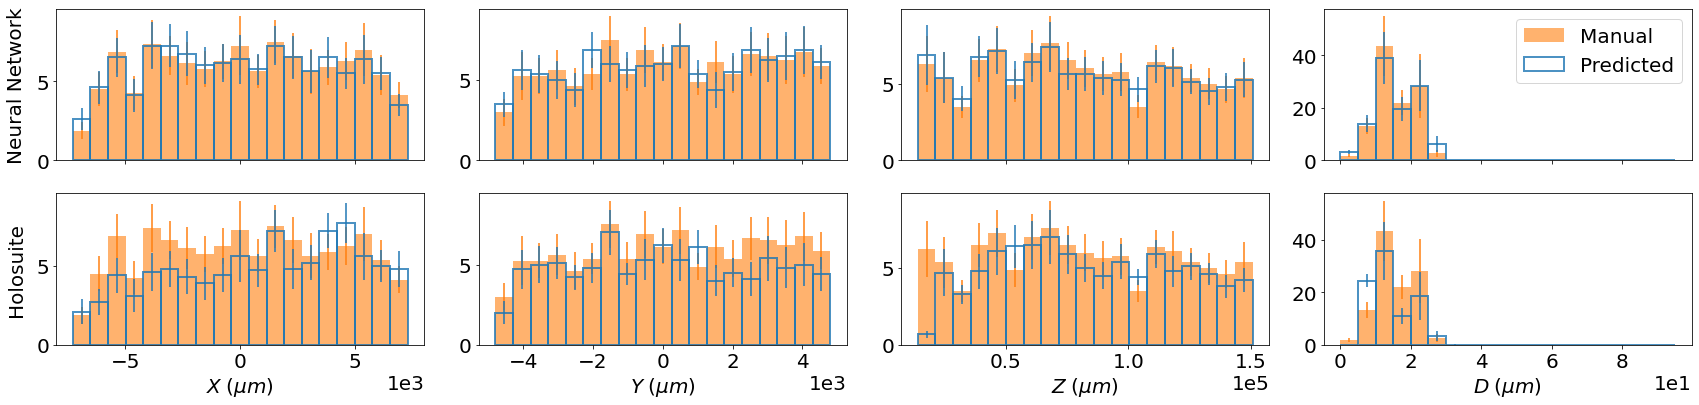

In [8]:
plt.rc('font', size=20)
fig, ax = plt.subplots(nrows=2, ncols=4, sharex='col', figsize=(24,6))
for i, coord in enumerate(['x', 'y', 'z', 'd']):
    _, binEdges = np.histogram(particles_manopt[10]['pred_2d'][coord], bins=bins[coord])
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    ax[0, i].bar(bincenters, hist_avg_manopt['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_manopt['true_2d'][f'{coord}_std'], label='Manual',
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[0, i].bar(bincenters, hist_avg_manopt['pred_2d'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_manopt['pred_2d'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[0, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1, i].bar(bincenters, hist_avg_manopt['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_manopt['true_2d'][f'{coord}_std'], label='Manual',
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[1, i].bar(bincenters, hist_avg_holosuite['pred_2d'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_holosuite['pred_2d'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[1, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
cols = ["$X\;({\mu}m)$", "$Y\;({\mu}m)$", "$Z\;({\mu}m)$", "$D\;({\mu}m)$"]
rows = ["Neural Network", "Holosuite"]
for a, col in zip(ax[1], cols):
    a.set_xlabel(col)
for a, row in zip(ax[:,0], rows):
    a.set_ylabel(row, rotation=90, labelpad=10)

ax[0,3].legend(fontsize=20)
fig.subplots_adjust(wspace=0.1)
fig.tight_layout()
fig.show()
fig.savefig(f"paper_figures/hist_manopt_holosuite.pdf", bbox_inches = "tight", dpi=300)
fig.savefig(f"paper_figures/hist_manopt_holosuite.png", bbox_inches = "tight", dpi=300)


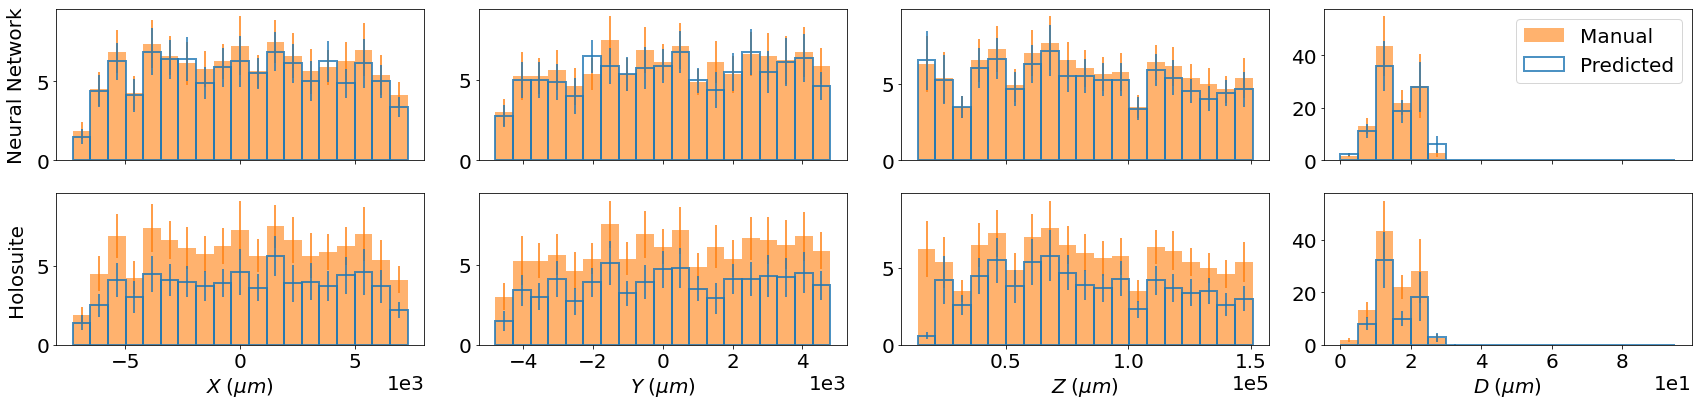

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex='col', figsize=(24,6))
for i, coord in enumerate(['x', 'y', 'z', 'd']):
    _, binEdges = np.histogram(particles_manopt[10]['pred_2d'][coord], bins=bins[coord])
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    ax[0, i].bar(bincenters, hist_avg_manopt['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_manopt['true_2d'][f'{coord}_std'], label='Manual',
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[0, i].bar(bincenters, hist_avg_manopt['pred_2d_matched'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_manopt['pred_2d_matched'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[0, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1, i].bar(bincenters, hist_avg_manopt['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_manopt['true_2d'][f'{coord}_std'], label='Manual',
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[1, i].bar(bincenters, hist_avg_holosuite['pred_2d_matched'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_holosuite['pred_2d_matched'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[1, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
cols = ["$X\;({\mu}m)$", "$Y\;({\mu}m)$", "$Z\;({\mu}m)$", "$D\;({\mu}m)$"]
rows = ["Neural Network", "Holosuite"]
for a, col in zip(ax[1], cols):
    a.set_xlabel(col)
for a, row in zip(ax[:,0], rows):
    a.set_ylabel(row, rotation=90, labelpad=10)

ax[0,3].legend(fontsize=20)
fig.subplots_adjust(wspace=0.1)
fig.tight_layout()
fig.show()
fig.savefig(f"paper_figures/hist_manopt_holosuite_matchedpred.pdf", bbox_inches = "tight", dpi=300)
fig.savefig(f"paper_figures/hist_manopt_holosuite_matchedpred.png", bbox_inches = "tight", dpi=300)


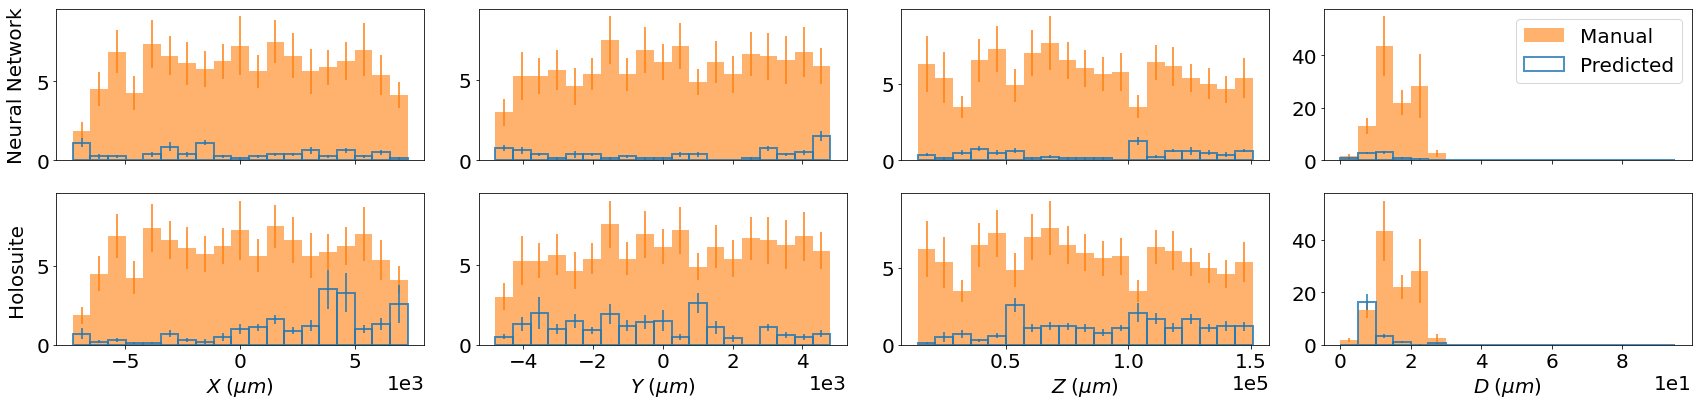

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex='col', figsize=(24,6))
for i, coord in enumerate(['x', 'y', 'z', 'd']):
    _, binEdges = np.histogram(particles_manopt[10]['pred_2d'][coord], bins=bins[coord])
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    ax[0, i].bar(bincenters, hist_avg_manopt['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_manopt['true_2d'][f'{coord}_std'], label='Manual',
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[0, i].bar(bincenters, hist_avg_manopt['pred_2d_unmatched'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_manopt['pred_2d_unmatched'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[0, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1, i].bar(bincenters, hist_avg_manopt['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_manopt['true_2d'][f'{coord}_std'], label='Manual',
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[1, i].bar(bincenters, hist_avg_holosuite['pred_2d_unmatched'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_holosuite['pred_2d_unmatched'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[1, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
cols = ["$X\;({\mu}m)$", "$Y\;({\mu}m)$", "$Z\;({\mu}m)$", "$D\;({\mu}m)$"]
rows = ["Neural Network", "Holosuite"]
for a, col in zip(ax[1], cols):
    a.set_xlabel(col)
for a, row in zip(ax[:,0], rows):
    a.set_ylabel(row, rotation=90, labelpad=10)

ax[0,3].legend(fontsize=20)
fig.subplots_adjust(wspace=0.1)
fig.tight_layout()
fig.show()
fig.savefig(f"paper_figures/hist_manopt_holosuite_unmatchedpred.pdf", bbox_inches = "tight", dpi=300)
fig.savefig(f"paper_figures/hist_manopt_holosuite_unmatchedpred.png", bbox_inches = "tight", dpi=300)


In [ ]:
min_manopt = 5000
max_manopt = 0

for h_idx in list(particles_manopt.keys()):
    print(h_idx)
    for true in ['pred_2d', 'true_2d', 'pred_2d_unmatched', 'true_2d_unmatched', 'pred_2d_matched', 'true_2d_matched']:
        if particles_manopt[h_idx][true]['d'].shape == (0,):
            print(f"{h_idx} {true} empty")
            continue
        if particles_manopt[h_idx][true]['d'].min() < min_manopt:
            print(f"New min {particles_manopt[h_idx][true]['d'].min()}")
            min_manopt = particles_manopt[h_idx][true]['d'].min()
        if particles_manopt[h_idx][true]['d'].max() > max_manopt:
            print(f"New max {particles_manopt[h_idx][true]['d'].max()}")
            max_manopt = particles_manopt[h_idx][true]['d'].max()


In [ ]:
min_holosuite = 5000
max_holosuite = 0

for h_idx in list(particles_holosuite.keys()):
    print(h_idx)
    for true in ['pred_2d', 'true_2d', 'pred_2d_unmatched', 'true_2d_unmatched', 'pred_2d_matched', 'true_2d_matched']:
        if particles_holosuite[h_idx][true]['d'].shape == (0,):
            print(f"{h_idx} {true} empty")
            continue
        if particles_holosuite[h_idx][true]['d'].min() < min_holosuite:
            print(f"New min {particles_holosuite[h_idx][true]['d'].min()}")
            min_holosuite = particles_holosuite[h_idx][true]['d'].min()
        if particles_holosuite[h_idx][true]['d'].max() > max_holosuite:
            print(f"New max {particles_holosuite[h_idx][true]['d'].max()}")
            max_holosuite = particles_holosuite[h_idx][true]['d'].max()


In [ ]:
# Set diameter max and min for rainbow colorscale
min_d = min(min_manopt, min_holosuite)
max_d = min(max_manopt, max_holosuite)


In [ ]:
data = go.Scatter3d(x=particles_manopt[10]['true_2d']['x'],
                    y=particles_manopt[10]['true_2d']['y'],
                    z=particles_manopt[10]['true_2d']['z'],
                    mode='markers',
                    marker=dict(size=particles_manopt[10]['true_2d']['d']/2,
#                                 color=particles_manopt[10]['true_2d']['d'],
#                                 colorscale='Rainbow',
#                                 cmin=min_d,
#                                 cmax=max_d,
                                opacity=0.8))
layout = go.Layout(width=600,
                   height=600)
fig = go.Figure(data=data, layout=layout)
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.5, y=1.5, z=1.5))
fig.update_layout(scene=dict(xaxis_title='X',
                             xaxis_tickformat='s',
                             yaxis_title='Y',
                             yaxis_tickformat='s',
                             zaxis_title='Z',
                             zaxis_tickformat='s'),
                  scene_camera=camera,
                  plot_bgcolor='rgba(0,0,0,0)',
                  paper_bgcolor='rgba(0,0,0,0)',
                  margin=dict(l=0, r=0, t=0, b=0, pad=0))
fig.write_image(f"paper_figures/3D_test.png")
fig.show()


In [ ]:
for h_idx in particles_holosuite.keys():
    for true in ['pred_2d', 'true_2d', 'pred_2d_unmatched', 'true_2d_unmatched', 'pred_2d_matched', 'true_2d_matched']:
        data = go.Scatter3d(x=particles_holosuite[h_idx][true]['x'],
                            y=particles_holosuite[h_idx][true]['y'],
                            z=particles_holosuite[h_idx][true]['z'],
                            mode='markers',
                            marker=dict(size=particles_holosuite[h_idx][true]['d']/2,
                                        color=particles_holosuite[h_idx][true]['d'],
                                        colorscale='Rainbow',
                                        cmin=min_d,
                                        cmax=max_d,
                                        opacity=0.8))
        
        layout = go.Layout(width=600,
                           height=600)
        fig = go.Figure(data=data, layout=layout)
        fig.update_layout(scene=dict(xaxis_title='X',
                                     xaxis_tickformat='s',
                                     yaxis_title='Y',
                                     yaxis_tickformat='s',
                                     zaxis_title='Z',
                                     zaxis_tickformat='s'),
                          scene_camera=dict(up=dict(x=0, y=0, z=1),
                                            center=dict(x=0, y=0, z=0),
                                            eye=dict(x=1.5, y=1.5, z=1.5)),
                          plot_bgcolor='rgba(0,0,0,0)',
                          paper_bgcolor='rgba(0,0,0,0)',
                          margin=dict(l=0, r=0, t=0, b=0, pad=0))
        fig.write_image(f"paper_figures/3D_{h_idx}_{true}_holosuite.png", format='png')
        fig.write_image(f"paper_figures/3D_{h_idx}_{true}_holosuite.pdf", format='pdf')
        fig.show()
        

In [ ]:
for h_idx in particles_holosuite.keys():
    for true in ['pred_2d', 'true_2d', 'pred_2d_unmatched', 'true_2d_unmatched', 'pred_2d_matched', 'true_2d_matched']:
        data = go.Scatter3d(x=particles_holosuite[h_idx][true]['x'],
                            y=particles_holosuite[h_idx][true]['y'],
                            z=particles_holosuite[h_idx][true]['z'],
                            mode='markers',
                            marker=dict(size=particles_holosuite[h_idx][true]['d']/2,
                                        opacity=0.8))
        
        layout = go.Layout(width=600,
                           height=600)
        fig = go.Figure(data=data, layout=layout)
        fig.update_layout(scene=dict(xaxis_title='X',
                                     xaxis_tickformat='s',
                                     yaxis_title='Y',
                                     yaxis_tickformat='s',
                                     zaxis_title='Z',
                                     zaxis_tickformat='s'),
                          scene_camera=dict(up=dict(x=0, y=0, z=1),
                                            center=dict(x=0, y=0, z=0),
                                            eye=dict(x=1.5, y=1.5, z=1.5)),
                          plot_bgcolor='rgba(0,0,0,0)',
                          paper_bgcolor='rgba(0,0,0,0)',
                          margin=dict(l=0, r=0, t=0, b=0, pad=0))
        fig.write_image(f"paper_figures/3D_{h_idx}_{true}_holosuite_blue.png", format='png')
        fig.write_image(f"paper_figures/3D_{h_idx}_{true}_holosuite_blue.pdf", format='pdf')
        fig.show()
        

In [ ]:
for h_idx in particles_manopt.keys():
    for true in ['pred_2d', 'true_2d', 'pred_2d_unmatched', 'true_2d_unmatched', 'pred_2d_matched', 'true_2d_matched']:
        data = go.Scatter3d(x=particles_manopt[h_idx][true]['x'],
                            y=particles_manopt[h_idx][true]['y'],
                            z=particles_manopt[h_idx][true]['z'],
                            mode='markers',
                            marker=dict(size=particles_manopt[h_idx][true]['d']/2,
                                        color=particles_manopt[h_idx][true]['d'],
                                        colorscale='Rainbow',
                                        cmin=min_d,
                                        cmax=max_d,
                                        opacity=0.8))
        
        layout = go.Layout(width=600,
                           height=600)
        fig = go.Figure(data=data, layout=layout)
        fig.update_layout(scene=dict(xaxis_title='X',
                                     xaxis_tickformat='s',
                                     yaxis_title='Y',
                                     yaxis_tickformat='s',
                                     zaxis_title='Z',
                                     zaxis_tickformat='s'),
                          scene_camera=dict(up=dict(x=0, y=0, z=1),
                                            center=dict(x=0, y=0, z=0),
                                            eye=dict(x=1.5, y=1.5, z=1.5)),
                          plot_bgcolor='rgba(0,0,0,0)',
                          paper_bgcolor='rgba(0,0,0,0)',
                          margin=dict(l=0, r=0, t=0, b=0, pad=0))
        fig.write_image(f"paper_figures/3D_{h_idx}_{true}_manopt.png", format='png')
        fig.show()
        

In [ ]:
for h_idx in particles_manopt.keys():
    for true in ['pred_2d', 'true_2d', 'pred_2d_unmatched', 'true_2d_unmatched', 'pred_2d_matched', 'true_2d_matched']:
        data = go.Scatter3d(x=particles_manopt[h_idx][true]['x'],
                            y=particles_manopt[h_idx][true]['y'],
                            z=particles_manopt[h_idx][true]['z'],
                            mode='markers',
                            marker=dict(size=particles_manopt[h_idx][true]['d']/2,
                                        opacity=0.8))
        
        layout = go.Layout(width=600,
                           height=600)
        fig = go.Figure(data=data, layout=layout)
        fig.update_layout(scene=dict(xaxis_title='X',
                                     xaxis_tickformat='s',
                                     yaxis_title='Y',
                                     yaxis_tickformat='s',
                                     zaxis_title='Z',
                                     zaxis_tickformat='s'),
                          scene_camera=dict(up=dict(x=0, y=0, z=1),
                                            center=dict(x=0, y=0, z=0),
                                            eye=dict(x=1.5, y=1.5, z=1.5)),
                          plot_bgcolor='rgba(0,0,0,0)',
                          paper_bgcolor='rgba(0,0,0,0)',
                          margin=dict(l=0, r=0, t=0, b=0, pad=0))
        fig.write_image(f"paper_figures/3D_{h_idx}_{true}_manopt_blue.png", format='png')
        fig.show()
        